In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import math

In [2]:
plt.rcParams['figure.figsize'] = [12, 6] #Make the graph big

In [4]:
# Generate time vector
duration = 1  # seconds
sampling_rate = 1000  # Hz
time_div = np.arange(0, duration, 1/sampling_rate) # x timeline
amplitude = 1

## Create Noisy Signal

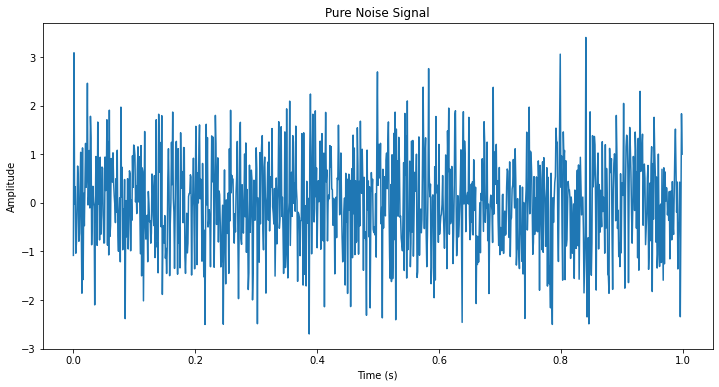

In [5]:
# Generate pure noise signal
noise = np.random.normal(0, 1, int(sampling_rate * duration))

plt.plot(time_div, noise)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Pure Noise Signal')
plt.show()

## Create Persistent Signal

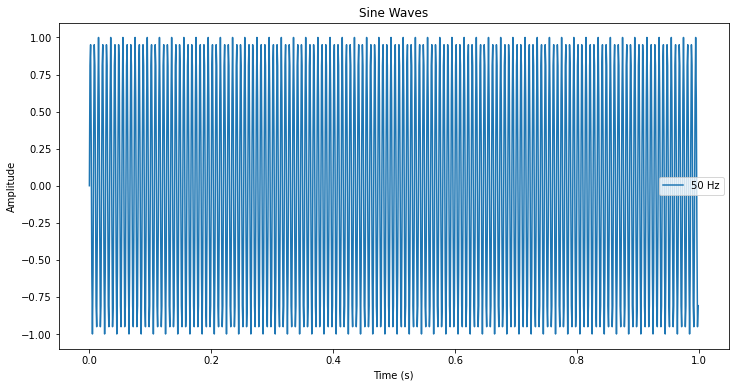

In [6]:
# Generate sine waves
persistent_sin_frequency = 150  # Hz
persistent_sin_wave = amplitude * np.sin(2 * np.pi * persistent_sin_frequency * time_div)

# Plot sine waves
plt.plot(time_div, persistent_sin_wave, label='50 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Waves')
plt.legend()
plt.show()

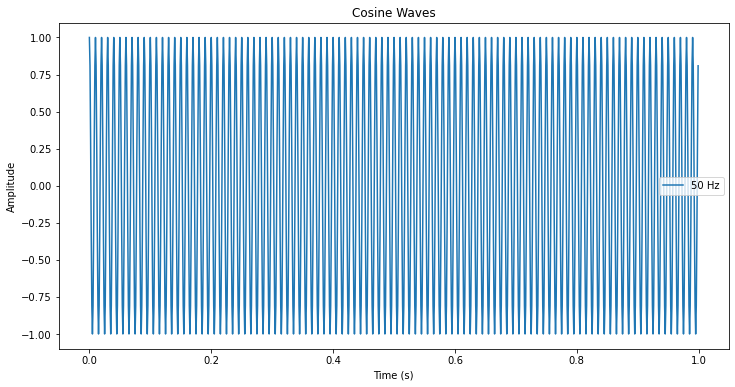

In [7]:
# Generate cosine waves
persistent_cos_frequency = 100  # Hz
persistent_cos_wave = amplitude * np.cos(2 * np.pi * persistent_cos_frequency * time_div)

# Plot sine waves
plt.plot(time_div, persistent_cos_wave, label='50 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Cosine Waves')
plt.legend()
plt.show()

## Combined Signal

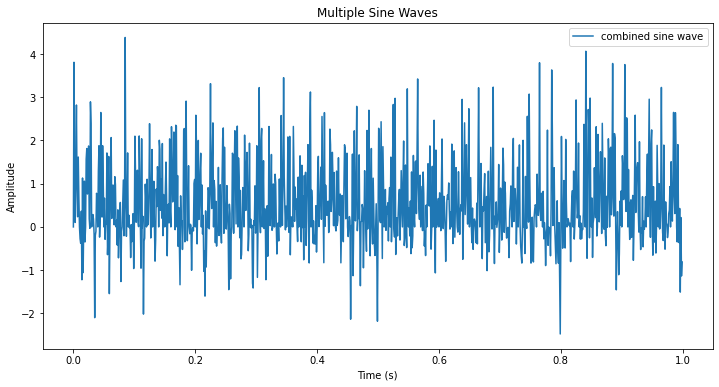

In [8]:
# Generate sine waves
combined_sin_wave = noise + persistent_sin_wave + persistent_cos_wave

# Plot sine waves
plt.plot(time_div, combined_sin_wave * persistent_sin_wave, label='combined sine wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Multiple Sine Waves')
plt.legend()
plt.show()

## Fourier Transform Brute Force

In [29]:
fourier_frequency = 0  # Hz
fourier_time = np.arange(0, len(combined_sin_wave), 1/(sampling_rate * 2))
# start_time = time.time()

magnitude_overview = np.zeros(len(fourier_time))
# frequency_range = np.arange(fourier_frequency, fourier_frequency_cap, fourier_frequency_cap/len(magnitude_overview))

# while fourier_frequency < len(combined_sin_wave):
#     fourier_sin_wave = amplitude * np.sin(2 * np.pi * fourier_frequency * time_div) #remember amplitude is 1
#     fourier_cos_wave = amplitude * np.cos(2 * np.pi * fourier_frequency * time_div) #remember amplitude is 1
#     fourier_sin_x = combined_sin_wave * fourier_sin_wave
#     fourier_cos_x = combined_sin_wave * fourier_cos_wave
#     fourier_final = fourier_sin_x + fourier_cos_x
#     above_x_axis = fourier_sin_x > 0
#     below_x_axis = fourier_sin_x < 0
#     area_above_x_axis = np.trapz(fourier_final[above_x_axis], time_div[above_x_axis])
#     area_under_x_axis = np.trapz(fourier_final[below_x_axis], time_div[below_x_axis])
#     area_combined = area_above_x_axis + area_under_x_axis
#     frequency_range[fourier_frequency] = fourier_frequency
#     magnitude_overview[fourier_frequency] = area_combined
#     fourier_frequency = fourier_frequency + 1
    
# end_time = time.time()
# elapsed_time = end_time - start_time
# print("Elapsed time: ", elapsed_time, " seconds")

In [28]:
len(fourier_time)

2000000

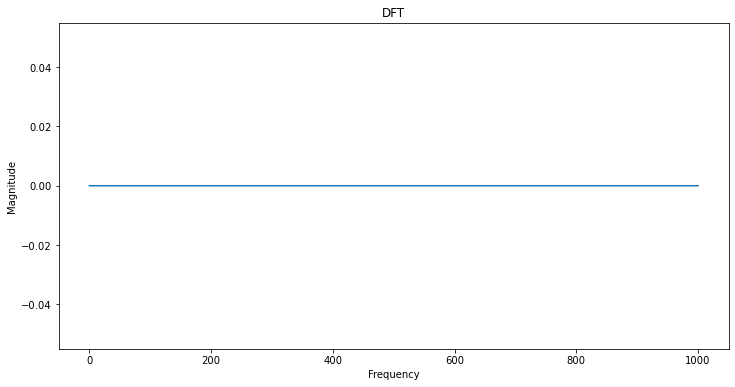

In [31]:
plt.plot(fourier_time, magnitude_overview, label='fourier')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT')
plt.show()

In [48]:
arr = np.arange(1, 10, 1)
arr_t = np.arange(1, 10, 1)

In [49]:
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
for i in range(len(arr)):
    print(f'imaginary: {arr[i] * np.exp(-2j * np.pi * 1000 * 1)}')
    print(f'imaginary: {arr[i] * np.exp(-2 * np.pi * 1000 * 1)}')

imaginary: (1+6.428332918551267e-13j)
imaginary: 0.0
imaginary: (2+1.2856665837102534e-12j)
imaginary: 0.0
imaginary: (3+1.92849987556538e-12j)
imaginary: 0.0
imaginary: (4+2.571333167420507e-12j)
imaginary: 0.0
imaginary: (5+3.2141664592756336e-12j)
imaginary: 0.0
imaginary: (6+3.85699975113076e-12j)
imaginary: 0.0
imaginary: (7+4.499833042985887e-12j)
imaginary: 0.0
imaginary: (8+5.142666334841014e-12j)
imaginary: 0.0
imaginary: (9+5.7854996266961404e-12j)
imaginary: 0.0


In [53]:
arr * np.exp(-2j * np.pi * 1000 * 1)

array([1.+6.42833292e-13j, 2.+1.28566658e-12j, 3.+1.92849988e-12j,
       4.+2.57133317e-12j, 5.+3.21416646e-12j, 6.+3.85699975e-12j,
       7.+4.49983304e-12j, 8.+5.14266633e-12j, 9.+5.78549963e-12j])

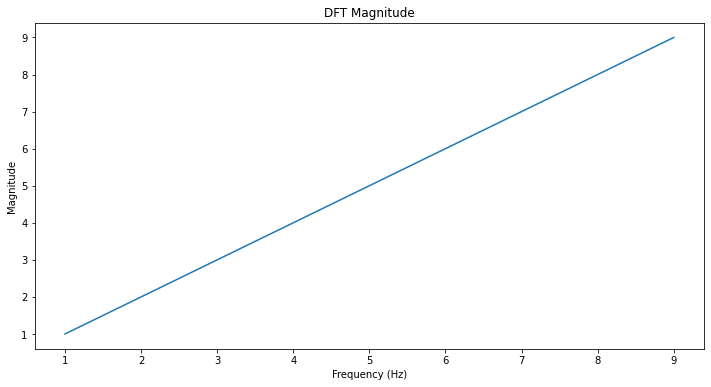

In [57]:
plt.plot(arr_t, abs(arr * np.exp(-2j * np.pi * 1000 * 1)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT Magnitude')
plt.show()

In [40]:
abs(np.exp(-2 * np.pi * 1000 * 1))

0.0

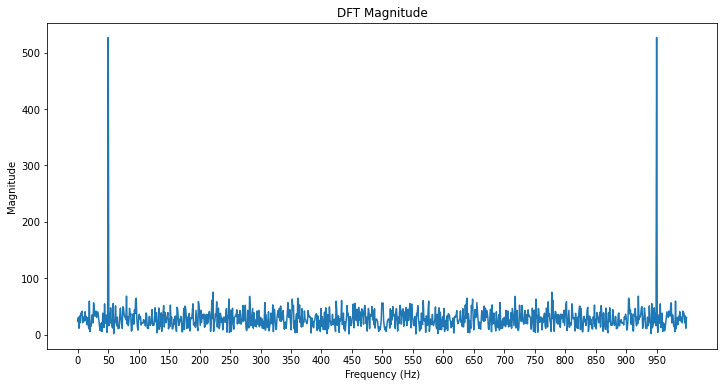

In [67]:
N = len(combined_sin_wave)
X = np.zeros(N, dtype=complex)
for k in range(N):
    for n in range(N):
        X[k] += combined_sin_wave[n] * np.exp(-2j * np.pi * k * n / N) #e^(-j2pift)

# Compute frequency axis
freqs = np.arange(N) * sampling_rate / len(combined_sin_wave)

# Plot results
plt.plot(freqs, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT Magnitude')
plt.xticks(np.arange(0, sampling_rate, 50))
plt.show()